<a href="https://colab.research.google.com/github/SSJ1452/Churn-prediction-and-analysis/blob/main/Churn_Analysis_and_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Telcom Churn Analysis

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Dataset Info:**
Sample Data Set containing Telco customer data and showing customers left last month

In [ ]:
#import the required libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.ticker as mtick
import matplotlib.pyplot as plt
%matplotlib inline




In [ ]:
telco_base_data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Dataset/churn_anal_final.csv')

In [ ]:
telco_base_data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,9541-ZPSEA,Male,0,Yes,Yes,68,Yes,No,Fiber optic,Yes,...,Yes,No,No,No,Two year,No,Credit card (automatic),80.35,5375.15,No
1,2665-NPTGL,Female,1,Yes,No,26,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),98.10,2510.7,No
2,1139-WUOAH,Male,0,No,No,57,No,No phone service,DSL,No,...,Yes,Yes,Yes,Yes,Two year,No,Credit card (automatic),53.35,3090.05,No
3,4693-VWVBO,Female,0,No,No,3,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Electronic check,19.55,61.05,No
4,6937-GCDGQ,Male,0,Yes,Yes,19,Yes,No,DSL,Yes,...,No,No,No,No,One year,Yes,Bank transfer (automatic),48.95,955.6,No


In [ ]:
telco_base_data.shape

(3744, 21)

In [ ]:
telco_base_data.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

In [ ]:
# Checking the data types of all the columns
telco_base_data.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [ ]:
# Check the descriptive statistics of numeric variables
telco_base_data.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,3744.000000,3744.000000,3744.000000
mean,0.194177,28.035524,67.843737
std,0.395619,24.007826,28.880477
min,0.000000,0.000000,18.550000
25%,0.000000,5.000000,45.300000
50%,0.000000,22.000000,74.550000
75%,0.000000,49.000000,91.000000
max,1.000000,72.000000,118.750000


SeniorCitizen is actually a categorical hence the 25%-50%-75% distribution is not propoer

75% customers have tenure less than 55 months

Average Monthly charges are USD 64.76 whereas 25% customers pay more than USD 89.85 per month

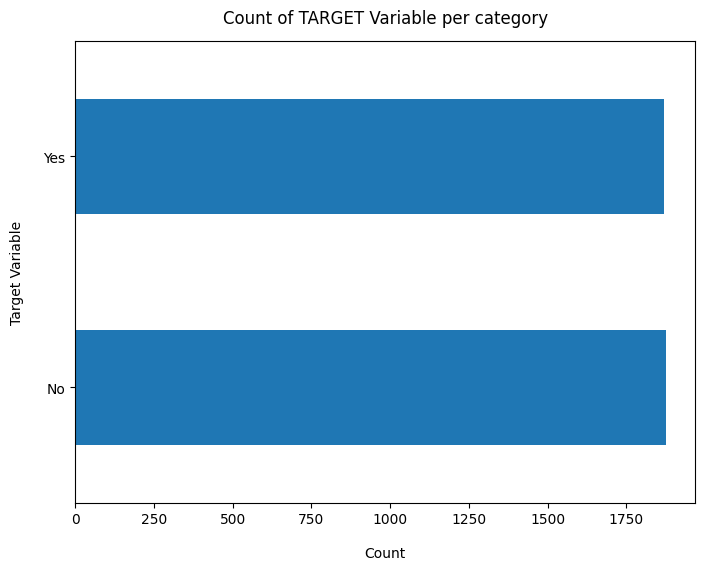

In [ ]:
telco_base_data['Churn'].value_counts().plot(kind='barh', figsize=(8, 6))
plt.xlabel("Count", labelpad=14)
plt.ylabel("Target Variable", labelpad=14)
plt.title("Count of TARGET Variable per category", y=1.02);

In [ ]:
100*telco_base_data['Churn'].value_counts()/len(telco_base_data['Churn'])

Churn
No     50.080128
Yes    49.919872
Name: count, dtype: float64

In [ ]:
telco_base_data['Churn'].value_counts()

Churn
No     1875
Yes    1869
Name: count, dtype: int64

* Data is highly imbalanced, ratio = 73:27<br>
* So we analyse the data with other features while taking the target values separately to get some insights.

**1.** Create a copy of base data for manupulation & processing

In [ ]:
telco_data = telco_base_data.copy()

**2.** Total Charges should be numeric amount. Let's convert it to numerical data type

In [ ]:
telco_data.TotalCharges = pd.to_numeric(telco_data.TotalCharges, errors='coerce')
telco_data.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        3
Churn               0
dtype: int64

**3.** As we can see there are 11 missing values in TotalCharges column. Let's check these records

In [ ]:
telco_data.loc[telco_data ['TotalCharges'].isnull() == True]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
551,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
1604,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No
1672,2775-SEFEE,Male,0,No,Yes,0,Yes,Yes,DSL,Yes,...,No,Yes,No,No,Two year,Yes,Bank transfer (automatic),61.90,NaN,No


**4. Missing Value Treatement**

Since the % of these records compared to total dataset is very low ie 0.15%, it is safe to ignore them from further processing.

In [ ]:
#Removing missing values
telco_data.dropna(how = 'any', inplace = True)

#telco_data.fillna(0)

**5.** Divide customers into bins based on tenure e.g. for tenure < 12 months: assign a tenure group if 1-12, for tenure between 1 to 2 Yrs, tenure group of 13-24; so on...

In [ ]:
# Get the max tenure
print(telco_data['tenure'].max()) #72

72


In [ ]:
# Group the tenure in bins of 12 months
labels = ["{0} - {1}".format(i, i + 11) for i in range(1, 72, 12)]

telco_data['tenure_group'] = pd.cut(telco_data.tenure, range(1, 80, 12), right=False, labels=labels)

In [ ]:
telco_data['tenure_group'].value_counts()

tenure_group
1 - 12     1418
13 - 24     577
61 - 72     569
25 - 36     413
49 - 60     395
37 - 48     369
Name: count, dtype: int64

**6.** Remove columns not required for processing

In [ ]:
#drop column customerID and tenure
telco_data.drop(columns= ['customerID','tenure'], axis=1, inplace=True)
telco_data.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
0,Male,0,Yes,Yes,Yes,No,Fiber optic,Yes,No,Yes,No,No,No,Two year,No,Credit card (automatic),80.35,5375.15,No,61 - 72
1,Female,1,Yes,No,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),98.10,2510.70,No,25 - 36
2,Male,0,No,No,No,No phone service,DSL,No,No,Yes,Yes,Yes,Yes,Two year,No,Credit card (automatic),53.35,3090.05,No,49 - 60
3,Female,0,No,No,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Electronic check,19.55,61.05,No,1 - 12
4,Male,0,Yes,Yes,Yes,No,DSL,Yes,No,No,No,No,No,One year,Yes,Bank transfer (automatic),48.95,955.60,No,13 - 24


## Data Exploration
**1. ** Plot distibution of individual predictors by churn

### Univariate Analysis

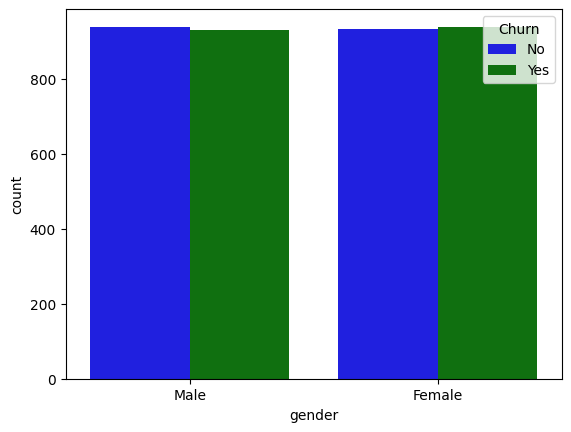

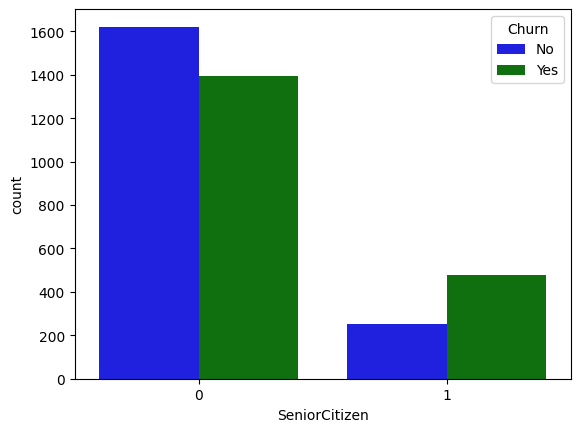

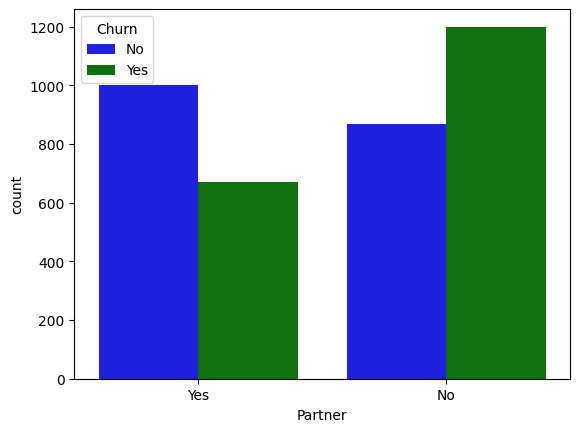

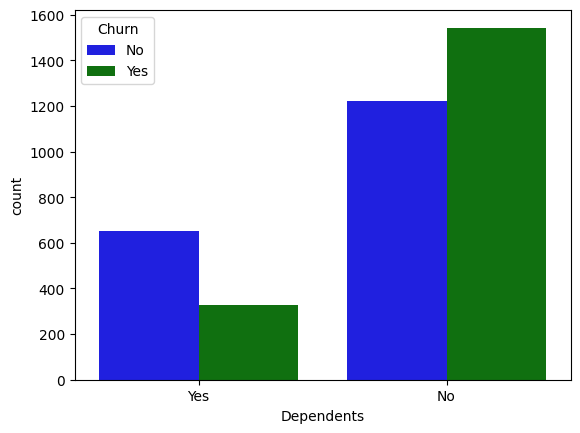

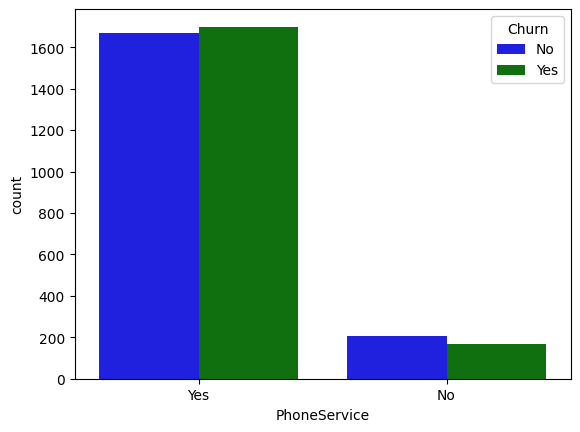

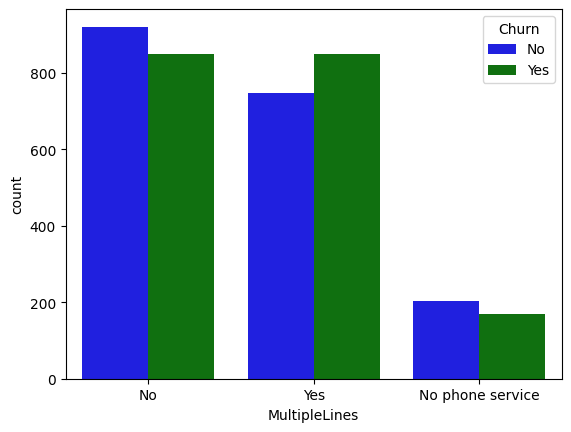

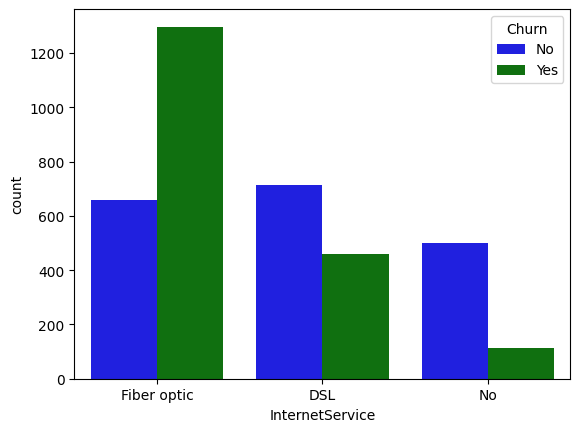

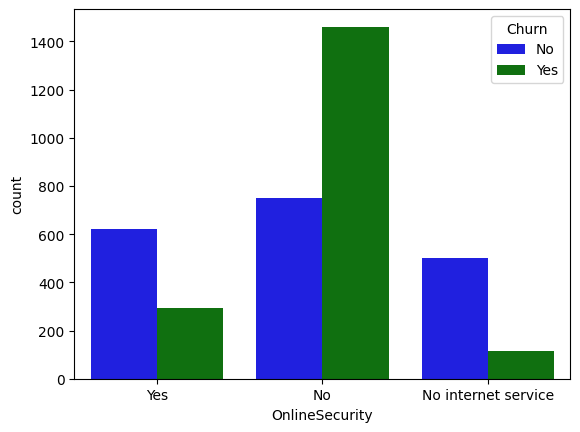

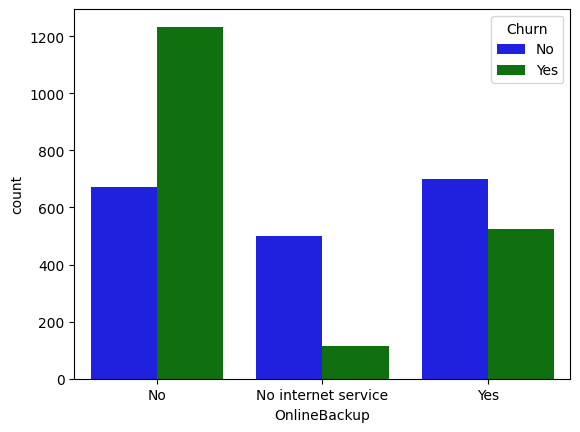

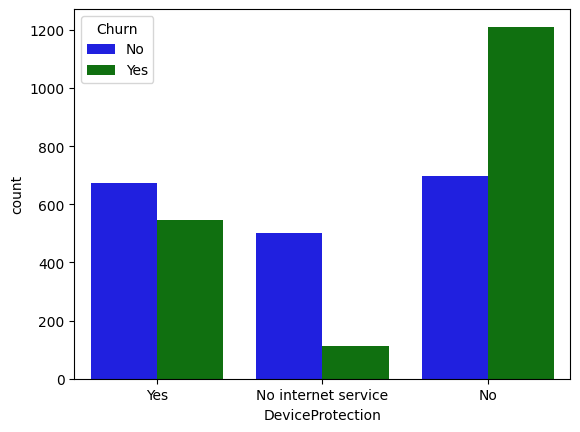

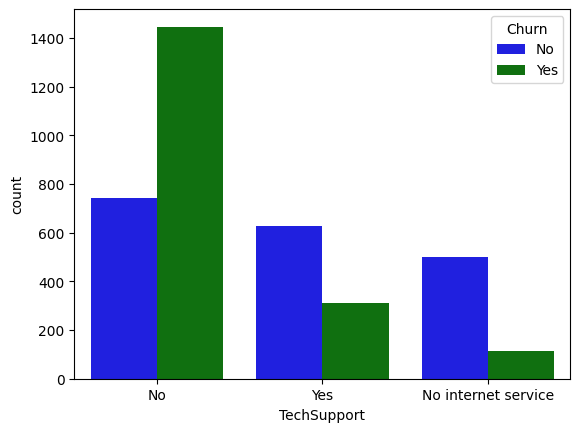

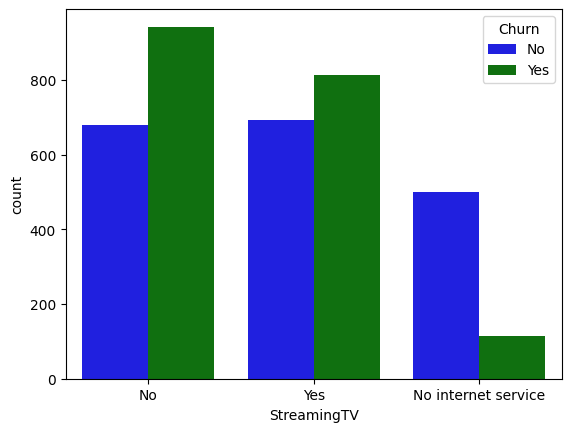

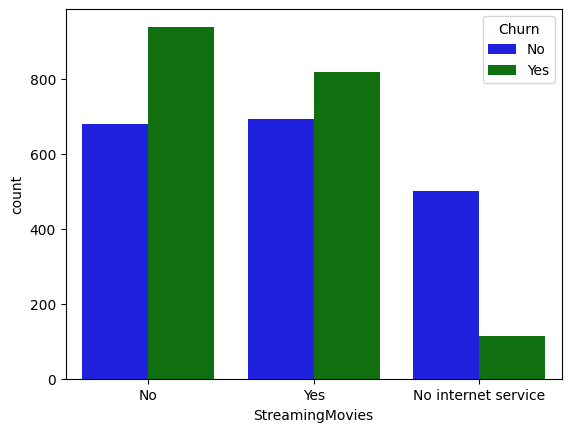

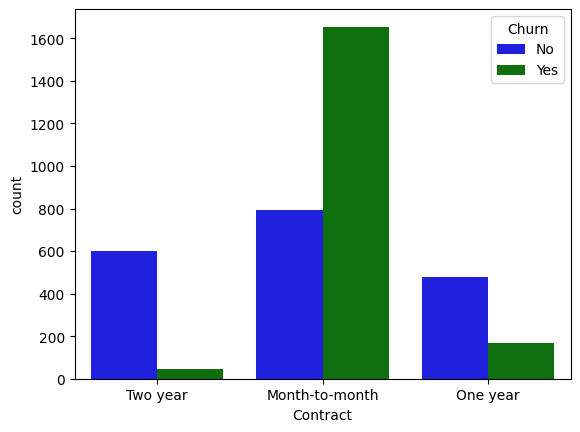

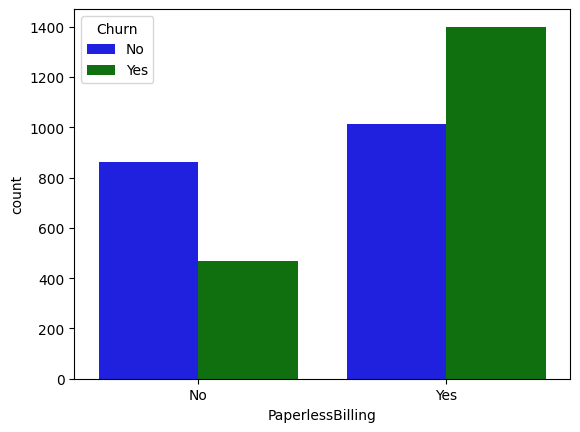

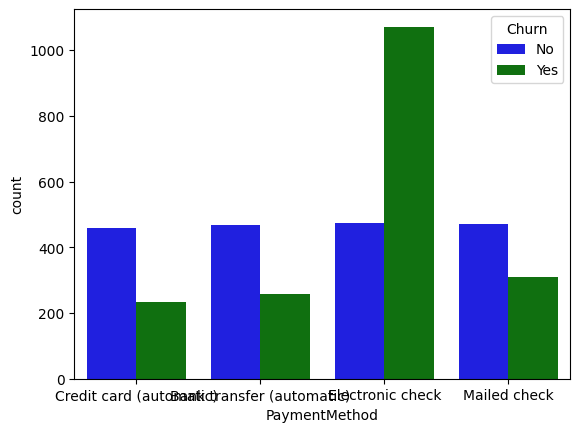

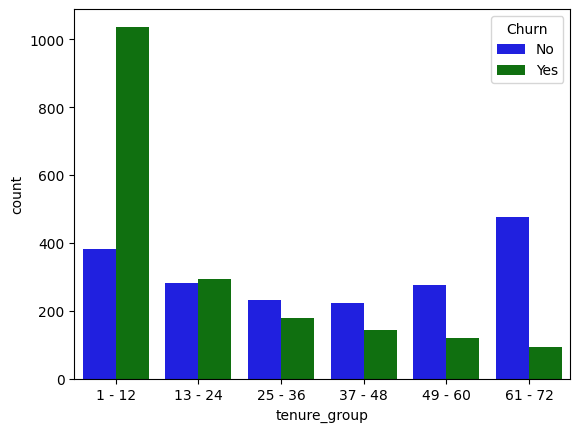

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Iterate over predictors
for i, predictor in enumerate(telco_data.drop(columns=['Churn', 'TotalCharges', 'MonthlyCharges'])):
    plt.figure(i)
    sns.countplot(data=telco_data, x=predictor, hue='Churn', palette=['blue', 'green'])

**2.** Convert the target variable 'Churn'  in a binary numeric variable i.e. Yes=1 ; No = 0

In [ ]:
telco_data['Churn'] = np.where(telco_data.Churn == 'Yes',1,0)

In [ ]:
telco_data.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
0,Male,0,Yes,Yes,Yes,No,Fiber optic,Yes,No,Yes,No,No,No,Two year,No,Credit card (automatic),80.35,5375.15,0,61 - 72
1,Female,1,Yes,No,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),98.10,2510.70,0,25 - 36
2,Male,0,No,No,No,No phone service,DSL,No,No,Yes,Yes,Yes,Yes,Two year,No,Credit card (automatic),53.35,3090.05,0,49 - 60
3,Female,0,No,No,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Electronic check,19.55,61.05,0,1 - 12
4,Male,0,Yes,Yes,Yes,No,DSL,Yes,No,No,No,No,No,One year,Yes,Bank transfer (automatic),48.95,955.60,0,13 - 24


**3.** Convert all the categorical variables into dummy variables

In [ ]:
telco_data_dummies = pd.get_dummies(telco_data)
telco_data_dummies.head()

,SeniorCitizen,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_1 - 12,tenure_group_13 - 24,tenure_group_25 - 36,tenure_group_37 - 48,tenure_group_49 - 60,tenure_group_61 - 72
0,0,80.35,5375.15,0,False,True,False,True,False,True,...,False,True,False,False,False,False,False,False,False,True
1,1,98.10,2510.70,0,True,False,False,True,True,False,...,True,False,False,False,False,False,True,False,False,False
2,0,53.35,3090.05,0,False,True,True,False,True,False,...,False,True,False,False,False,False,False,False,True,False
3,0,19.55,61.05,0,True,False,True,False,True,False,...,False,False,True,False,True,False,False,False,False,False
4,0,48.95,955.60,0,False,True,False,True,False,True,...,True,False,False,False,False,True,False,False,False,False


**10. ** Churn by Monthly Charges and Total Charges

<ipython-input-24-940d64c03b8e>:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  Mth = sns.kdeplot(telco_data_dummies.MonthlyCharges[(telco_data_dummies["Churn"] == 0) ],
<ipython-input-24-940d64c03b8e>:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  Mth = sns.kdeplot(telco_data_dummies.MonthlyCharges[(telco_data_dummies["Churn"] == 1) ],


Text(0.5, 1.0, 'Monthly charges by churn')

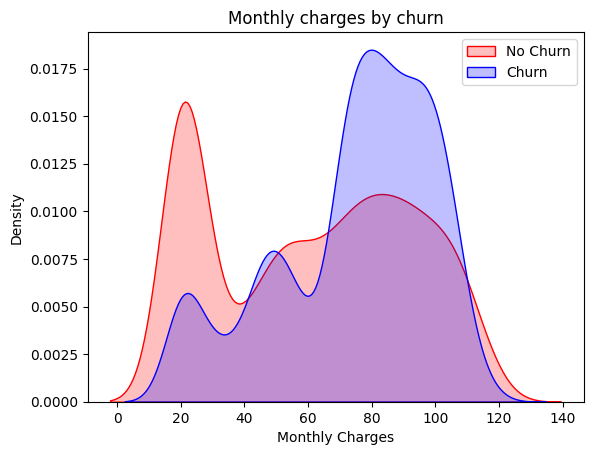

In [ ]:
Mth = sns.kdeplot(telco_data_dummies.MonthlyCharges[(telco_data_dummies["Churn"] == 0) ],
                color="Red", shade = True)
Mth = sns.kdeplot(telco_data_dummies.MonthlyCharges[(telco_data_dummies["Churn"] == 1) ],
                ax =Mth, color="Blue", shade= True)
Mth.legend(["No Churn","Churn"],loc='upper right')
Mth.set_ylabel('Density')
Mth.set_xlabel('Monthly Charges')
Mth.set_title('Monthly charges by churn')

**Insight:** Churn is high when Monthly Charges ar high

<ipython-input-25-aa9d55a4850a>:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  Tot = sns.kdeplot(telco_data_dummies.TotalCharges[(telco_data_dummies["Churn"] == 0) ],
<ipython-input-25-aa9d55a4850a>:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  Tot = sns.kdeplot(telco_data_dummies.TotalCharges[(telco_data_dummies["Churn"] == 1) ],


Text(0.5, 1.0, 'Total charges by churn')

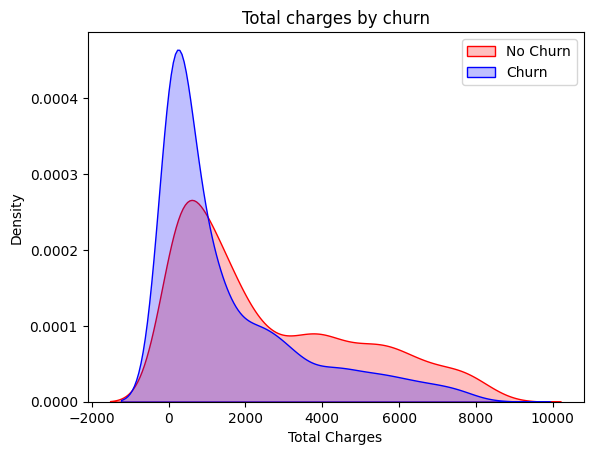

In [ ]:
Tot = sns.kdeplot(telco_data_dummies.TotalCharges[(telco_data_dummies["Churn"] == 0) ],
                color="Red", shade = True)
Tot = sns.kdeplot(telco_data_dummies.TotalCharges[(telco_data_dummies["Churn"] == 1) ],
                ax =Tot, color="Blue", shade= True)
Tot.legend(["No Churn","Churn"],loc='upper right')
Tot.set_ylabel('Density')
Tot.set_xlabel('Total Charges')
Tot.set_title('Total charges by churn')

As higher Churn at lower Total Charges

However if we combine the insights of 3 parameters i.e. Tenure, Monthly Charges & Total Charges then the picture is bit clear :- Higher Monthly Charge at lower tenure results into lower Total Charge. Hence, all these 3 factors viz **Higher Monthly Charge**,  **Lower tenure** and **Lower Total Charge** are linkd to **High Churn**.

**11. Build a corelation of all predictors with 'Churn' **

<Axes: >

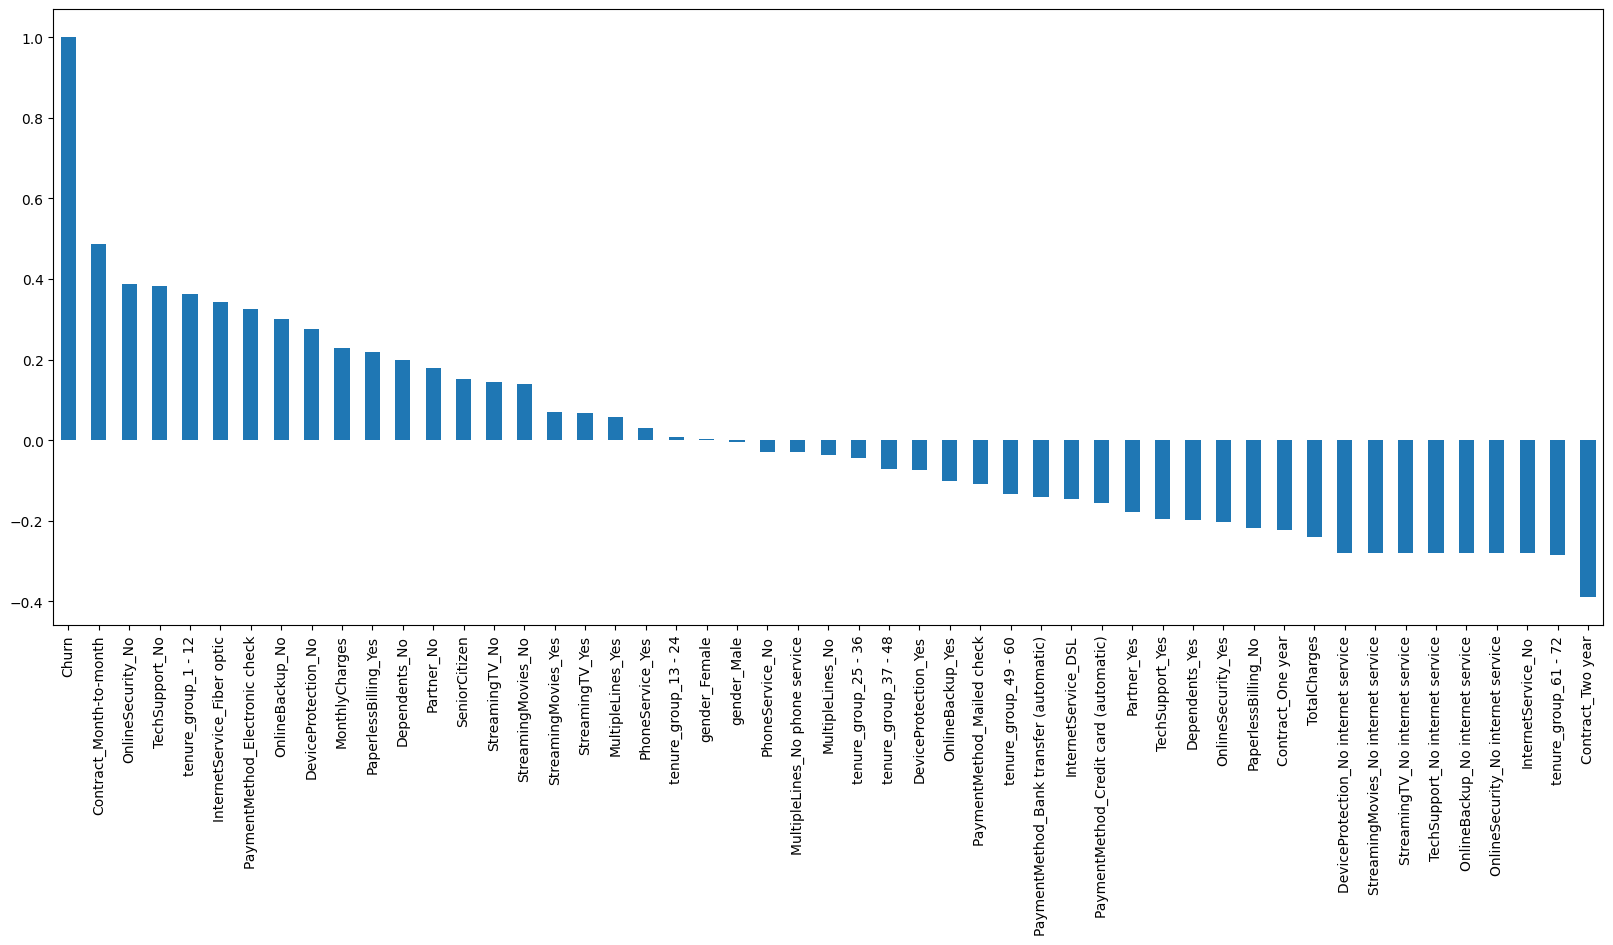

In [ ]:
plt.figure(figsize=(20,8))
telco_data_dummies.corr()['Churn'].sort_values(ascending = False).plot(kind='bar')



**HIGH** Churn seen in case of  **Month to month contracts**, **No online security**, **No Tech support**, **First year of subscription** and **Fibre Optics Internet**

**LOW** Churn is seens in case of **Long term contracts**, **Subscriptions without internet service** and **The customers engaged for 5+ years**

Factors like **Gender**, **Availability of PhoneService** and **# of multiple lines** have alomost **NO** impact on Churn

This is also evident from the **Heatmap** below

<Axes: >

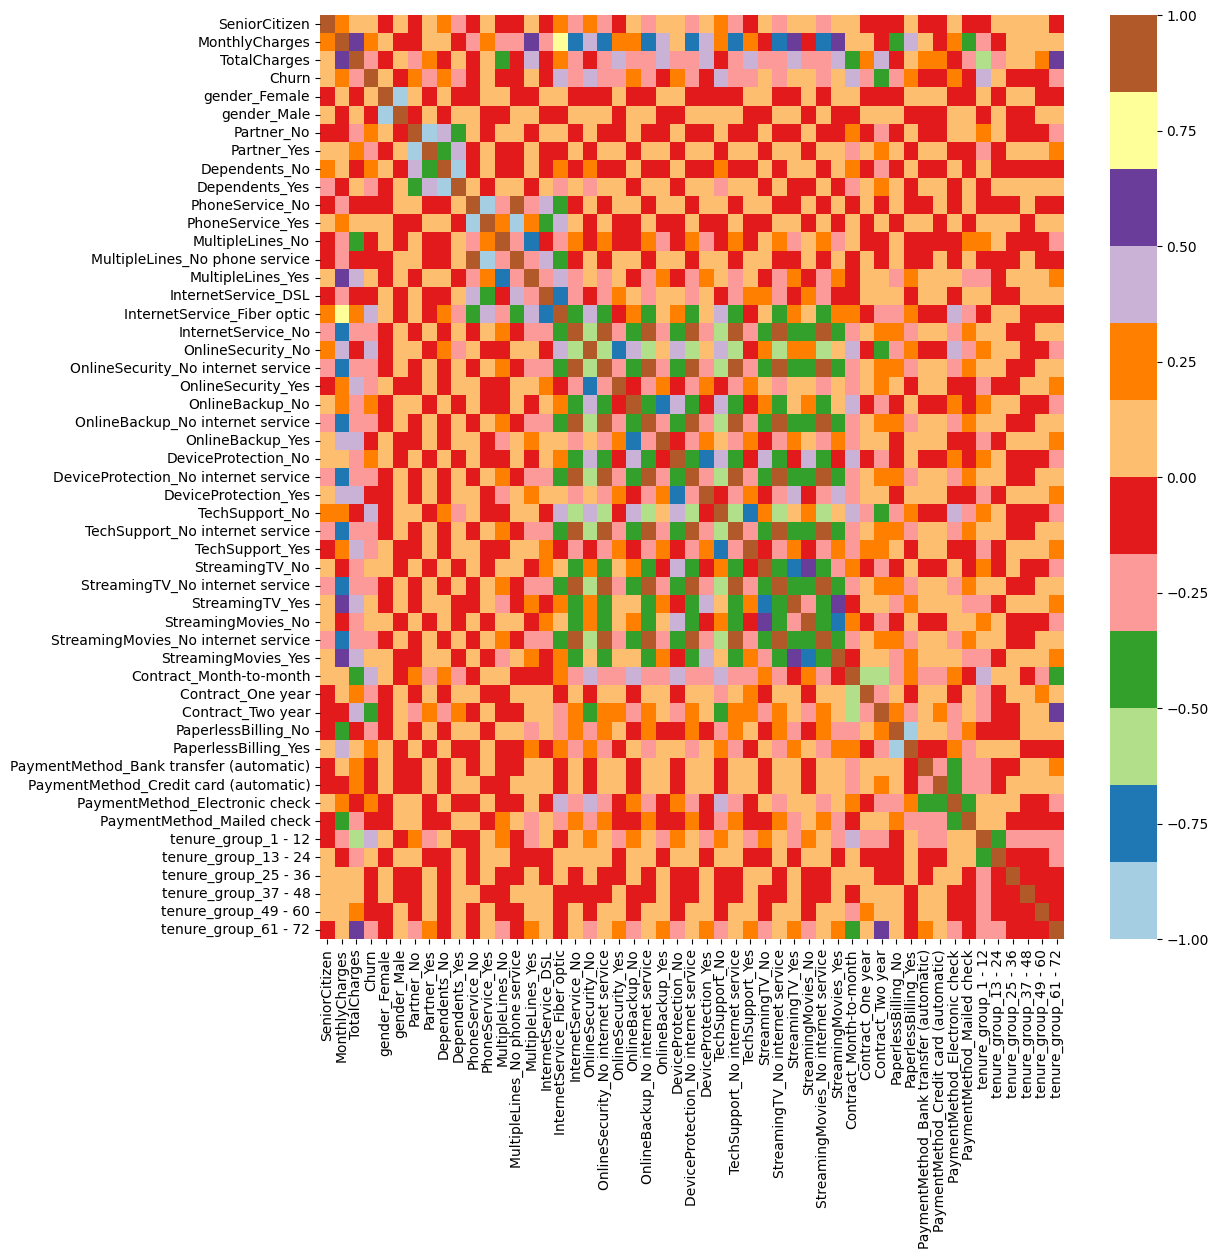

In [ ]:
plt.figure(figsize=(12,12))
sns.heatmap(telco_data_dummies.corr(), cmap="Paired")

# Model



### Decision Tree

In [ ]:
import pandas as pd
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from imblearn.combine import SMOTEENN

df=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Dataset/tel_churn_final.csv")

df=df.drop('Unnamed: 0',axis=1)

x=df.drop('Churn',axis=1)

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

#CART

model_dt=DecisionTreeClassifier(criterion = "gini",random_state = 100,max_depth=6, min_samples_leaf=8)

model_dt.fit(x_train,y_train)

y_pred=model_dt.predict(x_test)

model_dt.score(x_test,y_test)



0.7349397590361446

In [ ]:
print(classification_report(y_test, y_pred, labels=[0,1]))

              precision    recall  f1-score   support

           0       0.80      0.66      0.72       390
           1       0.69      0.82      0.75       357

    accuracy                           0.73       747
   macro avg       0.74      0.74      0.73       747
weighted avg       0.74      0.73      0.73       747



##SVM

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from imblearn.combine import SMOTEENN

# Load the dataset
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Dataset/tel_churn_final.csv")

# Drop unnecessary column
df = df.drop('Unnamed: 0', axis=1)

# Separate features (X) and target variable (y)
X = df.drop('Churn', axis=1)
y = df['Churn']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply SMOTEENN to handle class imbalance
smote_enn = SMOTEENN(random_state=42)
X_train_resampled, y_train_resampled = smote_enn.fit_resample(X_train, y_train)

# Standardize features (important for SVM)
scaler = StandardScaler()
X_train_resampled_scaled = scaler.fit_transform(X_train_resampled)
X_test_scaled = scaler.transform(X_test)

# Support Vector Machine (SVM) model
model_svm = SVC(kernel='linear', random_state=42)

# Train the model
model_svm.fit(X_train_resampled_scaled, y_train_resampled)

# Make predictions
y_pred = model_svm.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Classification report
print(classification_report(y_test, y_pred))

# Confusion matrix
conf_mat = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_mat)


Accuracy: 0.76
              precision    recall  f1-score   support

           0       0.78      0.75      0.77       393
           1       0.74      0.77      0.75       354

    accuracy                           0.76       747
   macro avg       0.76      0.76      0.76       747
weighted avg       0.76      0.76      0.76       747

Confusion Matrix:
[[296  97]
 [ 82 272]]


# Random Forest

In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import joblib


# Load the dataset
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Dataset/tel_churn_final.csv')

print(df.info())

# Drop unnecessary columns
df = df.drop('Unnamed: 0', axis=1)

# One-hot encode categorical variables
df_encoded = pd.get_dummies(df)

# Define features (X) and target variable (y)
X = df_encoded.drop('Churn', axis=1)
y = df_encoded['Churn']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Random Forest classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Save the trained model as a pickle file
joblib.dump(rf_model, 'rf_model.pkl')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3733 entries, 0 to 3732
Data columns (total 52 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Unnamed: 0                               3733 non-null   int64  
 1   SeniorCitizen                            3733 non-null   int64  
 2   MonthlyCharges                           3733 non-null   float64
 3   TotalCharges                             3733 non-null   float64
 4   Churn                                    3733 non-null   int64  
 5   gender_Female                            3733 non-null   int64  
 6   gender_Male                              3733 non-null   int64  
 7   Partner_No                               3733 non-null   int64  
 8   Partner_Yes                              3733 non-null   int64  
 9   Dependents_No                            3733 non-null   int64  
 10  Dependents_Yes                           3733 no

['rf_model.pkl']

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Predictions
y_pred = rf_model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.7791164658634538

Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.77      0.78       393
           1       0.75      0.79      0.77       354

    accuracy                           0.78       747
   macro avg       0.78      0.78      0.78       747
weighted avg       0.78      0.78      0.78       747


Confusion Matrix:
 [[301  92]
 [ 73 281]]


In [ ]:
import pandas as pd
import joblib  # For loading the trained model

# Load the pre-trained Random Forest model
rf_model = joblib.load('rf_model.pkl')

# Define the list of features (columns) used in your model
features_list = [
    'SeniorCitizen', 'MonthlyCharges', 'TotalCharges', 'gender_Female', 'gender_Male',
    'Partner_No', 'Partner_Yes', 'Dependents_No', 'Dependents_Yes',
    'PhoneService_No', 'PhoneService_Yes', 'MultipleLines_No', 'MultipleLines_No phone service', 'MultipleLines_Yes',
    'InternetService_DSL', 'InternetService_Fiber optic', 'InternetService_No',
    'OnlineSecurity_No', 'OnlineSecurity_No internet service', 'OnlineSecurity_Yes',
    'OnlineBackup_No', 'OnlineBackup_No internet service', 'OnlineBackup_Yes',
    'DeviceProtection_No', 'DeviceProtection_No internet service', 'DeviceProtection_Yes',
    'TechSupport_No', 'TechSupport_No internet service', 'TechSupport_Yes',
    'StreamingTV_No', 'StreamingTV_No internet service', 'StreamingTV_Yes',
    'StreamingMovies_No', 'StreamingMovies_No internet service', 'StreamingMovies_Yes',
    'Contract_Month-to-month', 'Contract_One year', 'Contract_Two year',
    'PaperlessBilling_No', 'PaperlessBilling_Yes',
    'PaymentMethod_Bank transfer (automatic)', 'PaymentMethod_Credit card (automatic)',
    'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check',
    'tenure_group_1 - 12', 'tenure_group_13 - 24', 'tenure_group_25 - 36',
    'tenure_group_37 - 48', 'tenure_group_49 - 60', 'tenure_group_61 - 72'
]






In [ ]:
# Function to get user input for each feature
def get_user_input():
    user_input = {}
    for feature in features_list:
        value = input(f"Enter value for '{feature}': ")
        user_input[feature] = value
    return user_input


In [ ]:
# Function to preprocess user input and make predictions
def predict_churn_probability(user_input, model):

    input_df = pd.DataFrame([user_input])


    input_df_encoded = pd.get_dummies(input_df)

    missing_cols = set(X.columns) - set(input_df_encoded.columns)
    for col in missing_cols:
        input_df_encoded[col] = 0

    # Reorder columns to match the model's input format
    input_df_encoded = input_df_encoded[X.columns]

    # Predict churn probability
    churn_probability = model.predict_proba(input_df_encoded)[:, 1]  # Probability of churn (class 1)

    return churn_probability[0]


In [ ]:
1# Main function to interactively predict churn probability
def main():
    print("Enter values for each feature to predict churn probability.")
    user_input = get_user_input()
    churn_probability = predict_churn_probability(user_input, rf_model)
    print(f"\nPredicted Churn Probability: {churn_probability:.2f}")

# Run the main function
if __name__ == "__main__":
    main()

Enter values for each feature to predict churn probability.
Enter value for 'SeniorCitizen': 1
Enter value for 'MonthlyCharges': 60
Enter value for 'TotalCharges': 7200
Enter value for 'gender_Female': 0
Enter value for 'gender_Male': 1
Enter value for 'Partner_No': 0
Enter value for 'Partner_Yes': 1
Enter value for 'Dependents_No': 0
Enter value for 'Dependents_Yes': 1
Enter value for 'PhoneService_No': 0
Enter value for 'PhoneService_Yes': 1
Enter value for 'MultipleLines_No': 0
Enter value for 'MultipleLines_No phone service': 1
Enter value for 'MultipleLines_Yes': 0
Enter value for 'InternetService_DSL': 1
Enter value for 'InternetService_Fiber optic': 0
Enter value for 'InternetService_No': 1
Enter value for 'OnlineSecurity_No': 0
Enter value for 'OnlineSecurity_No internet service': 1
Enter value for 'OnlineSecurity_Yes': 0
Enter value for 'OnlineBackup_No': 1
Enter value for 'OnlineBackup_No internet service': 0
Enter value for 'OnlineBackup_Yes': 1
Enter value for 'DeviceProtec